## Beyond the Myths: A Data-Driven Analysis of Common Myths in Football
An exploratory data analysis project about popular beliefs within the world of football


## Problem Statement
This project explores two common football beliefs: "2-0 is a dangerous scoreline" and "Teams perform better at home" 

The goal is to examine the validity of these beliefs using data from the Premier League across the last ten seasons (From 2013/14 to 2023/24)


## Initial Setup


Lets start by importing the libraries which we will use for this project

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

Subsequently, lets import the raw data

In [2]:
DatasetPath = glob.glob(r'C:\Users\Eben\Documents\Python Project\Football Dataset/*.csv')  


Lets put our raw data into a dataframe in order to undertake some data cleaning & transformation techniques

We use a for loop here to add each file in the Football Dataset folder into a dataframe

In [3]:
dataframes = []

for file in DatasetPath:
    df = pd.read_csv(file)
    dataframes.append(df)

Now that we have all of our dataframes let combine it into one dataframe

In [4]:
df = pd.concat(dataframes, ignore_index=True)

Lets have a quick look at the data

In [5]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Time
0,E0,16/08/2014,Arsenal,Crystal Palace,2,1,H,1,1,D,...,2,13,19,9,3,2,2,0,1,NaN
1,E0,16/08/2014,Leicester,Everton,2,2,D,1,2,A,...,3,16,10,3,6,1,1,0,0,NaN
2,E0,16/08/2014,Man United,Swansea,1,2,A,0,1,A,...,4,14,20,4,0,2,4,0,0,NaN
3,E0,16/08/2014,QPR,Hull,0,1,A,0,0,D,...,4,10,10,8,9,1,2,0,0,NaN
4,E0,16/08/2014,Stoke,Aston Villa,0,1,A,0,0,D,...,2,14,9,2,8,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,E0,19/05/2024,Crystal Palace,Aston Villa,5,0,H,2,0,H,...,2,10,8,2,4,1,4,0,0,16:00
3796,E0,19/05/2024,Liverpool,Wolves,2,0,H,2,0,H,...,3,14,11,10,2,1,1,0,1,16:00
3797,E0,19/05/2024,Luton,Fulham,2,4,A,1,2,A,...,7,15,20,4,4,5,4,0,0,16:00
3798,E0,19/05/2024,Man City,West Ham,3,1,H,2,1,H,...,2,3,12,11,2,0,1,0,0,16:00


## Data Cleaning

As with any other dataset, some data cleaning techniques will be needed

Below we will loop through the data to see if there is any columns with any missing information

In [6]:

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

Div - 0%
Date - 0%
HomeTeam - 0%
AwayTeam - 0%
FTHG - 0%
FTAG - 0%
FTR - 0%
HTHG - 0%
HTAG - 0%
HTR - 0%
Referee - 0%
HS - 0%
AS - 0%
HST - 0%
AST - 0%
HF - 0%
AF - 0%
HC - 0%
AC - 0%
HY - 0%
AY - 0%
HR - 0%
AR - 0%
Time - 50%


Based on our above code we can see that 50% of the entries in the Time row are missing as we are not going to use this column for any analysis we can just drop the column

In [7]:
del df["Time"]

Lets check again to see if Time has been deleted

In [8]:

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

Div - 0%
Date - 0%
HomeTeam - 0%
AwayTeam - 0%
FTHG - 0%
FTAG - 0%
FTR - 0%
HTHG - 0%
HTAG - 0%
HTR - 0%
Referee - 0%
HS - 0%
AS - 0%
HST - 0%
AST - 0%
HF - 0%
AF - 0%
HC - 0%
AC - 0%
HY - 0%
AY - 0%
HR - 0%
AR - 0%


Our next step would be to improve our naming conventions of our columns as its pretty ambigious, so lets change these column names to make it easier to understand

In [9]:
df = df.rename(columns = {
    'FTHG': 'FullTimeHomeTeamGoals',
    'FTAG': 'FullTimeAwayTeamGoals',
    'FTR': 'FullTimeResult',
    'HTHG': 'HalfTimeHomeTeamGoals',
    'HTAG': 'HalfTimeAwayTeamGoals',
    'HTR': 'HalfTimeResult',
    'Referee': 'Referee',
    'HS': 'HomeTeamShots',
    'AS': 'AwayTeamShots',
    'HST': 'HomeTeamShotsOnTarget',
    'AST': 'AwayTeamShotsOnTarget',
    'HF': 'HomeTeamFoulsCommitted',
    'AF': 'AwayTeamFoulsCommitted',
    'HC': 'HomeTeamCorners',
    'AC': 'AwayTeamCorners',
    'HY': 'HomeTeamYellowCards',
    'AY': 'AwayTeamYellowCards',
    'HR': 'HomeTeamRedCards',
    'AR': 'AwayTeamRedCards'})

Knowing the nature of our dataset, there should not be any duplicate rows, but just to be safe let's remove them anyway


In [10]:
df.drop_duplicates()


,Div,Date,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HalfTimeResult,...,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamFoulsCommitted,AwayTeamFoulsCommitted,HomeTeamCorners,AwayTeamCorners,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards
0,E0,16/08/2014,Arsenal,Crystal Palace,2,1,H,1,1,D,...,6,2,13,19,9,3,2,2,0,1
1,E0,16/08/2014,Leicester,Everton,2,2,D,1,2,A,...,3,3,16,10,3,6,1,1,0,0
2,E0,16/08/2014,Man United,Swansea,1,2,A,0,1,A,...,5,4,14,20,4,0,2,4,0,0
3,E0,16/08/2014,QPR,Hull,0,1,A,0,0,D,...,6,4,10,10,8,9,1,2,0,0
4,E0,16/08/2014,Stoke,Aston Villa,0,1,A,0,0,D,...,2,2,14,9,2,8,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,E0,19/05/2024,Crystal Palace,Aston Villa,5,0,H,2,0,H,...,9,2,10,8,2,4,1,4,0,0
3796,E0,19/05/2024,Liverpool,Wolves,2,0,H,2,0,H,...,14,3,14,11,10,2,1,1,0,1
3797,E0,19/05/2024,Luton,Fulham,2,4,A,1,2,A,...,6,7,15,20,4,4,5,4,0,0
3798,E0,19/05/2024,Man City,West Ham,3,1,H,2,1,H,...,12,2,3,12,11,2,0,1,0,0


Let's have a look to see if there are any abbreviations within our team names

In [11]:
df["HomeTeam"].unique()

array(['Arsenal', 'Leicester', 'Man United', 'QPR', 'Stoke', 'West Brom',
       'West Ham', 'Liverpool', 'Newcastle', 'Burnley', 'Aston Villa',
       'Chelsea', 'Crystal Palace', 'Everton', 'Southampton', 'Swansea',
       'Hull', 'Sunderland', 'Tottenham', 'Man City', 'Bournemouth',
       'Norwich', 'Watford', 'Middlesbrough', 'Brighton', 'Huddersfield',
       'Fulham', 'Wolves', 'Cardiff', 'Sheffield United', 'Leeds',
       'Brentford', "Nott'm Forest", 'Luton'], dtype=object)

We can see the Nott'm Forrest is an abbreviation so lets change it to its original name just to further improve the clarity within our data

In [12]:
df['HomeTeam'] = df['HomeTeam'].replace({"Nott'm Forest": "Nottingham Forest"})
df['AwayTeam'] = df['AwayTeam'].replace({"Nott'm Forest": "Nottingham Forest"})


Peforming a sense check of the data types will help me to see if any additional transformation is required

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Div                     3800 non-null   object
 1   Date                    3800 non-null   object
 2   HomeTeam                3800 non-null   object
 3   AwayTeam                3800 non-null   object
 4   FullTimeHomeTeamGoals   3800 non-null   int64 
 5   FullTimeAwayTeamGoals   3800 non-null   int64 
 6   FullTimeResult          3800 non-null   object
 7   HalfTimeHomeTeamGoals   3800 non-null   int64 
 8   HalfTimeAwayTeamGoals   3800 non-null   int64 
 9   HalfTimeResult          3800 non-null   object
 10  Referee                 3800 non-null   object
 11  HomeTeamShots           3800 non-null   int64 
 12  AwayTeamShots           3800 non-null   int64 
 13  HomeTeamShotsOnTarget   3800 non-null   int64 
 14  AwayTeamShotsOnTarget   3800 non-null   int64 
 15  Home

## Analysis
Let's start by filtering out the rows in which the Home team have been winning 2-0 at half  time & also rows in which the Away team have been winning 2-0 at half time

Afterwards we will then see how often this has happened

In [14]:
HomeWinning2 = df[(df["HalfTimeHomeTeamGoals"] == 2) & (df["HalfTimeAwayTeamGoals"] == 0)]
HomeWinning2

,Div,Date,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HalfTimeResult,...,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamFoulsCommitted,AwayTeamFoulsCommitted,HomeTeamCorners,AwayTeamCorners,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards
13,E0,23/08/2014,Everton,Arsenal,2,2,D,2,0,H,...,2,3,10,18,3,3,1,4,0,0
25,E0,30/08/2014,Swansea,West Brom,3,0,H,2,0,H,...,8,2,10,8,0,7,1,2,0,0
27,E0,31/08/2014,Aston Villa,Hull,2,1,H,2,0,H,...,4,3,9,10,3,7,1,4,0,0
34,E0,13/09/2014,Southampton,Newcastle,4,0,H,2,0,H,...,7,4,15,7,5,5,0,2,0,0
58,E0,28/09/2014,West Brom,Burnley,4,0,H,2,0,H,...,6,2,7,9,10,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3762,E0,27/04/2024,Aston Villa,Chelsea,2,2,D,2,0,H,...,4,5,13,14,2,4,3,5,0,0
3775,E0,05/05/2024,Liverpool,Tottenham,4,2,H,2,0,H,...,13,6,14,12,8,3,1,4,0,0
3776,E0,06/05/2024,Crystal Palace,Man United,4,0,H,2,0,H,...,10,2,12,8,6,3,1,1,0,0
3795,E0,19/05/2024,Crystal Palace,Aston Villa,5,0,H,2,0,H,...,9,2,10,8,2,4,1,4,0,0


In [15]:
AwayWinning2=df[(df["HalfTimeAwayTeamGoals"] == 2) & (df["HalfTimeHomeTeamGoals"] == 0)]
AwayWinning2

,Div,Date,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HalfTimeResult,...,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamFoulsCommitted,AwayTeamFoulsCommitted,HomeTeamCorners,AwayTeamCorners,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards
12,E0,23/08/2014,Crystal Palace,West Ham,1,3,A,0,2,A,...,4,8,14,11,6,9,1,3,0,0
84,E0,25/10/2014,West Brom,Crystal Palace,2,2,D,0,2,A,...,4,6,14,8,6,3,3,1,0,0
108,E0,09/11/2014,Tottenham,Stoke,1,2,A,0,2,A,...,4,4,20,13,5,5,3,2,1,0
188,E0,28/12/2014,West Ham,Arsenal,1,2,A,0,2,A,...,4,7,12,13,7,8,3,3,0,0
227,E0,31/01/2015,West Brom,Tottenham,0,3,A,0,2,A,...,4,4,8,13,6,3,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,E0,10/03/2024,West Ham,Burnley,2,2,D,0,2,A,...,4,4,11,18,4,4,2,4,0,0
3743,E0,20/04/2024,Luton,Brentford,1,5,A,0,2,A,...,3,9,13,9,4,9,1,2,0,0
3744,E0,20/04/2024,Sheffield United,Burnley,1,4,A,0,2,A,...,11,9,10,9,11,2,1,0,0,0
3783,E0,11/05/2024,Wolves,Crystal Palace,1,3,A,0,2,A,...,7,3,13,12,8,3,3,2,0,1


Amount of times the Home team has been winning 2-0

In [16]:
HomeWinning2.shape[0]

288

Amount of times the Away team has been winning 2-0

In [17]:
AwayWinning2.shape[0]

194

Let's take a look at the full time results when the home team was winning 2-0, subsequently we will plot this on a pie chart

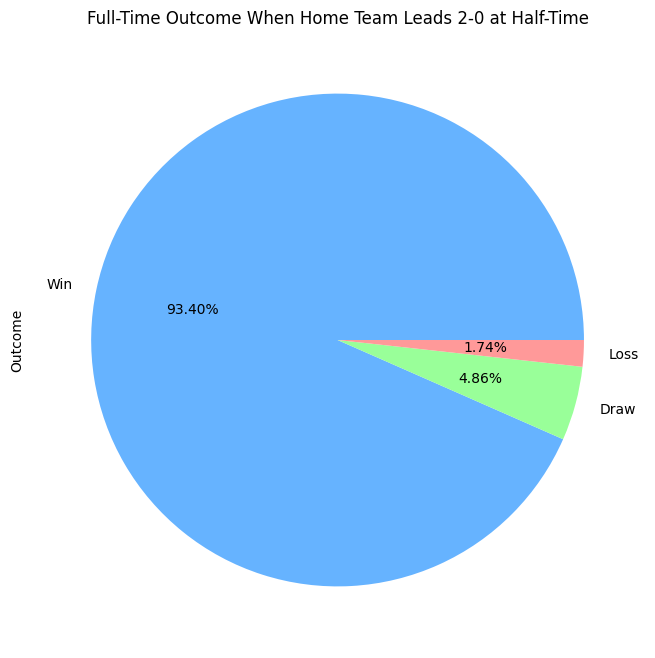

In [18]:
HomeWinning2 = HomeWinning2.copy()

HomeWinning2.loc[:, "FullTimeOutcome"] = HomeWinning2.apply(
    lambda row: "Win" if row["FullTimeHomeTeamGoals"] > row["FullTimeAwayTeamGoals"] 
                else "Draw" if row["FullTimeHomeTeamGoals"] == row["FullTimeAwayTeamGoals"] 
                else "Loss", axis=1
)

OutcomeHome2 = HomeWinning2["FullTimeOutcome"].value_counts()
OutcomeHome2.plot(
    kind='pie', 
    autopct='%1.2f%%',
    figsize=(8, 8), 
    colors=['#66b3ff', '#99ff99', '#ff9999'])
plt.ylabel('Outcome');
plt.title("Full-Time Outcome When Home Team Leads 2-0 at Half-Time");  

Now lets repeat the above for when the Away team is leading 2-0 at half time

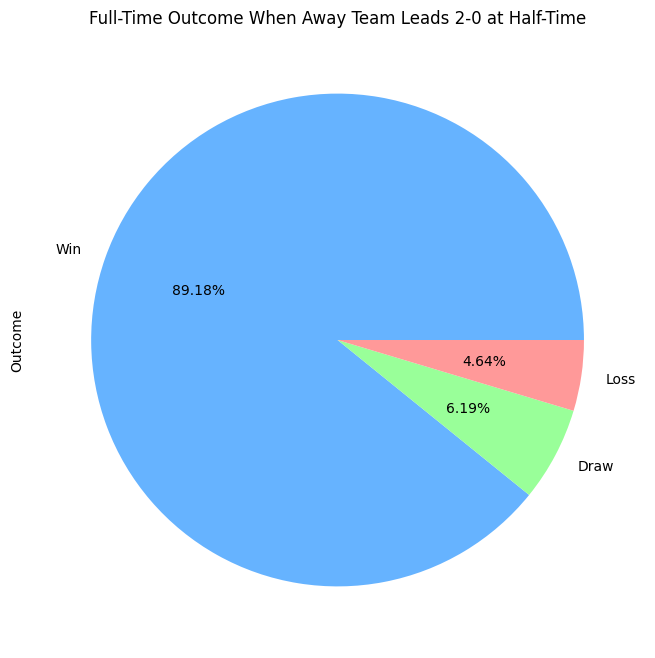

In [19]:

AwayWinning2 = AwayWinning2.copy()
AwayWinning2["FullTimeOutcome"] = AwayWinning2.apply(
    lambda row: "Win" if row["FullTimeAwayTeamGoals"] > row["FullTimeHomeTeamGoals"] 
                else "Draw" if row["FullTimeAwayTeamGoals"] == row["FullTimeHomeTeamGoals"] 
                else "Loss", axis=1
)

OutcomeAway2 = AwayWinning2["FullTimeOutcome"].value_counts()
OutcomeAway2.plot(
    kind='pie', 
    autopct='%1.2f%%',
    figsize=(8, 8), 
    colors=['#66b3ff', '#99ff99', '#ff9999']) 
plt.ylabel('Outcome');
plt.title("Full-Time Outcome When Away Team Leads 2-0 at Half-Time");  

We can see that when a team is winning 2-0 at halftime they are overwhelmingly likely to win the game - 93.4% and 89.18% respectively for Home and Away teams.<br />
This indicates that 2-0 is not a dangerous scoreline as leading teams are very likely to finish the game with a win based on the historical data we have collected.<br />
A possible explanation is that when a team is winning at half time, they are just simply more likely to win the game because the losing team has a bigger deficit to overturn, our below analysis will explore this further.<br /><br />
An interesting insight that can be derived from comparing the two pie charts is that there is a home advtange. When the Away team is leading by 2-0 at half time they are less likely to win the game compared to the Home team (89.18% vs 93.4%) - we will explore this insight further later on within this project.

Let's take a look at games were the Home team is winning 1-0 at half time

In [20]:

HomeWinning1 = df[(df["HalfTimeHomeTeamGoals"] == 1) & (df["HalfTimeAwayTeamGoals"] == 0)]
HomeWinning1

,Div,Date,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HalfTimeResult,...,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamFoulsCommitted,AwayTeamFoulsCommitted,HomeTeamCorners,AwayTeamCorners,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards
7,E0,17/08/2014,Liverpool,Southampton,2,1,H,1,0,H,...,5,6,8,11,2,6,1,2,0,0
15,E0,23/08/2014,Swansea,Burnley,1,0,H,1,0,H,...,5,1,14,13,2,3,2,1,0,0
16,E0,24/08/2014,Hull,Stoke,1,1,D,1,0,H,...,2,3,10,10,4,5,1,3,1,0
19,E0,25/08/2014,Man City,Liverpool,3,1,H,1,0,H,...,4,3,13,7,6,7,1,1,0,0
24,E0,30/08/2014,QPR,Sunderland,1,0,H,1,0,H,...,5,6,8,9,4,6,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,E0,02/05/2024,Chelsea,Tottenham,2,0,H,1,0,H,...,5,3,12,16,4,9,0,1,0,0
3768,E0,04/05/2024,Arsenal,Bournemouth,3,0,H,1,0,H,...,9,2,16,12,6,1,2,3,0,0
3779,E0,11/05/2024,Everton,Sheffield United,1,0,H,1,0,H,...,6,1,6,11,3,6,1,2,0,0
3789,E0,15/05/2024,Man United,Newcastle,3,2,H,1,0,H,...,8,8,16,7,9,9,3,3,0,0


Let's repeat the above but for Away teams now

In [21]:
AwayWinning1 = df[(df["HalfTimeHomeTeamGoals"] == 0) & (df["HalfTimeAwayTeamGoals"] == 1)]
AwayWinning1

,Div,Date,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HalfTimeResult,...,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamFoulsCommitted,AwayTeamFoulsCommitted,HomeTeamCorners,AwayTeamCorners,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards
2,E0,16/08/2014,Man United,Swansea,1,2,A,0,1,A,...,5,4,14,20,4,0,2,4,0,0
8,E0,17/08/2014,Newcastle,Man City,0,2,A,0,1,A,...,0,5,8,11,3,3,1,5,0,0
29,E0,31/08/2014,Tottenham,Liverpool,0,3,A,0,1,A,...,1,8,14,11,7,3,0,4,0,0
30,E0,13/09/2014,Arsenal,Man City,2,2,D,0,1,A,...,6,8,11,15,0,3,3,4,0,0
33,E0,13/09/2014,Liverpool,Aston Villa,0,1,A,0,1,A,...,1,1,9,10,7,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,E0,11/05/2024,Fulham,Man City,0,4,A,0,1,A,...,1,9,9,6,1,7,1,0,1,0
3782,E0,11/05/2024,West Ham,Luton,3,1,H,0,1,A,...,8,1,9,15,7,6,1,3,0,0
3785,E0,12/05/2024,Man United,Arsenal,0,1,A,0,1,A,...,2,5,5,6,4,7,0,2,0,0
3788,E0,15/05/2024,Brighton,Chelsea,1,2,A,0,1,A,...,2,6,13,14,4,6,2,2,0,1


Number of times a Home team has been winning 1-0 at half time:


In [22]:
HomeWinning1.shape[0]

741

Number of times a Away team has been winning 1-0 at half time:


In [23]:
# Number of times a away team has been winning 1-0
AwayWinning1.shape[0]

573

We are now going to perform the same analysis that we did for when teams were winning 2-0 at half time

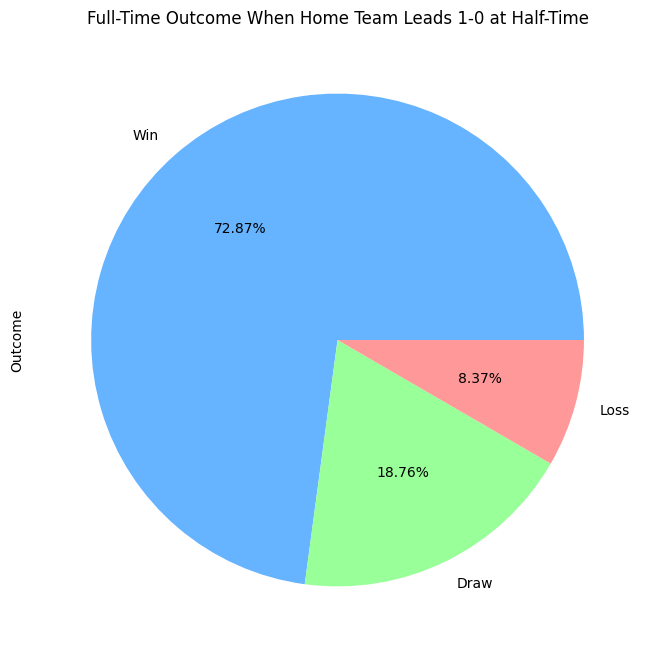

In [24]:
HomeWinning1 = HomeWinning1.copy()
HomeWinning1["FullTimeOutcome"] = HomeWinning1.apply(
    lambda row: "Win" if row["FullTimeHomeTeamGoals"] > row["FullTimeAwayTeamGoals"] 
                else "Draw" if row["FullTimeHomeTeamGoals"] == row["FullTimeAwayTeamGoals"] 
                else "Loss", axis=1
)

OutcomeHome1 = HomeWinning1["FullTimeOutcome"].value_counts()
OutcomeHome1.plot(
    kind='pie', 
    autopct='%1.2f%%',
    figsize=(8, 8), 
    colors=['#66b3ff', '#99ff99', '#ff9999']) 
plt.ylabel('Outcome');
plt.title("Full-Time Outcome When Home Team Leads 1-0 at Half-Time");  

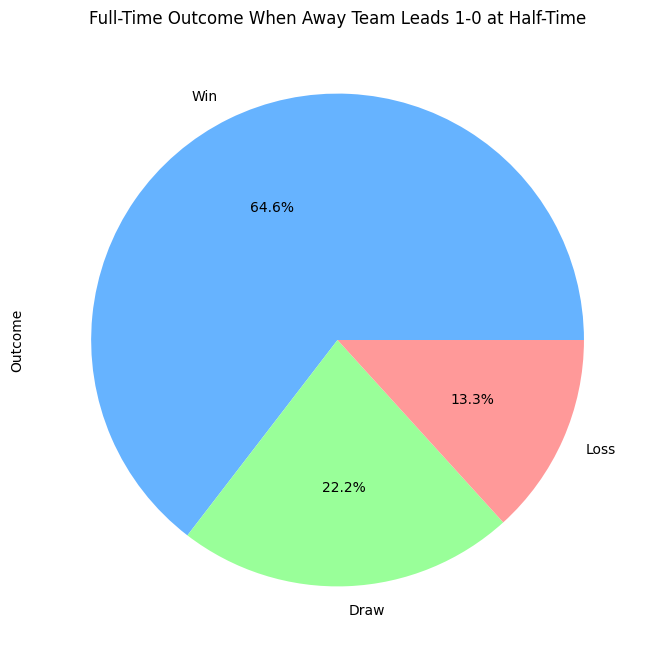

In [25]:
AwayWinning1 = AwayWinning1.copy()
AwayWinning1["FullTimeOutcome"] = AwayWinning1.apply(
    lambda row: "Win" if row["FullTimeAwayTeamGoals"] > row["FullTimeHomeTeamGoals"] 
                else "Draw" if row["FullTimeAwayTeamGoals"] == row["FullTimeHomeTeamGoals"] 
                else "Loss", axis=1
)

OutcomeAway1 = AwayWinning1["FullTimeOutcome"].value_counts()
OutcomeAway1.plot(
    kind='pie', 
    autopct='%1.1f%%',
    figsize=(8, 8), 
    colors=['#66b3ff', '#99ff99', '#ff9999']) 
plt.ylabel('Outcome');
plt.title("Full-Time Outcome When Away Team Leads 1-0 at Half-Time");  

Let's repeat the above but for situations where the team is leading by 3-0 at half time

In [26]:
HomeWinning3 = df[(df["HalfTimeHomeTeamGoals"] == 3) & (df["HalfTimeAwayTeamGoals"] == 0)]
HomeWinning3

,Div,Date,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HalfTimeResult,...,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamFoulsCommitted,AwayTeamFoulsCommitted,HomeTeamCorners,AwayTeamCorners,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards
18,E0,24/08/2014,Tottenham,QPR,4,0,H,3,0,H,...,5,1,12,6,7,6,0,1,0,0
38,E0,14/09/2014,Man United,QPR,4,0,H,3,0,H,...,9,2,11,8,3,1,1,0,0,0
76,E0,18/10/2014,Southampton,Sunderland,8,0,H,3,0,H,...,11,1,11,8,5,6,1,3,0,0
145,E0,06/12/2014,Stoke,Arsenal,3,2,H,3,0,H,...,4,6,17,14,3,9,3,2,0,1
224,E0,31/01/2015,Man United,Leicester,3,1,H,3,0,H,...,5,1,8,12,4,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,E0,30/01/2024,Luton,Brighton,4,0,H,3,0,H,...,8,2,13,14,7,4,2,2,0,0
3639,E0,03/02/2024,Brighton,Crystal Palace,4,1,H,3,0,H,...,6,5,8,14,3,2,1,3,0,0
3714,E0,02/04/2024,Nottingham Forest,Fulham,3,1,H,3,0,H,...,4,3,7,8,3,8,0,0,0,0
3772,E0,04/05/2024,Man City,Wolves,5,1,H,3,0,H,...,12,1,4,17,6,0,0,4,0,0


In [27]:
AwayWinning3 = df[(df["HalfTimeHomeTeamGoals"] == 0) & (df["HalfTimeAwayTeamGoals"] == 3)]
AwayWinning3

,Div,Date,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HalfTimeResult,...,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamFoulsCommitted,AwayTeamFoulsCommitted,HomeTeamCorners,AwayTeamCorners,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards
40,E0,20/09/2014,Aston Villa,Arsenal,0,3,A,0,3,A,...,2,3,11,9,5,5,1,3,0,0
179,E0,26/12/2014,West Brom,Man City,1,3,A,0,3,A,...,6,5,5,9,10,6,0,1,0,0
305,E0,04/04/2015,West Brom,QPR,1,4,A,0,3,A,...,6,7,6,15,2,4,2,3,1,0
348,E0,04/05/2015,Hull,Arsenal,1,3,A,0,3,A,...,1,9,8,11,0,5,2,0,0,0
625,E0,06/02/2016,Stoke,Everton,0,3,A,0,3,A,...,3,6,11,8,6,4,1,0,0,0
685,E0,02/04/2016,Bournemouth,Man City,0,4,A,0,3,A,...,2,7,9,8,4,4,0,1,0,0
787,E0,27/08/2016,Watford,Arsenal,1,3,A,0,3,A,...,6,7,18,15,3,2,6,1,0,0
869,E0,06/11/2016,Swansea,Man United,1,3,A,0,3,A,...,1,3,9,16,2,0,0,2,0,0
949,E0,01/01/2017,Watford,Tottenham,1,4,A,0,3,A,...,2,6,11,6,0,3,3,0,0,0
989,E0,01/02/2017,West Ham,Man City,0,4,A,0,3,A,...,1,4,11,14,2,4,3,3,0,0


Number of times a Home team has been winning 3-0 at half time

In [28]:
HomeWinning3.shape[0]

75

Number of times an Away team has been winning 3-0 at half time

In [29]:
AwayWinning3.shape[0]

48

Plotting the results into a pie chart

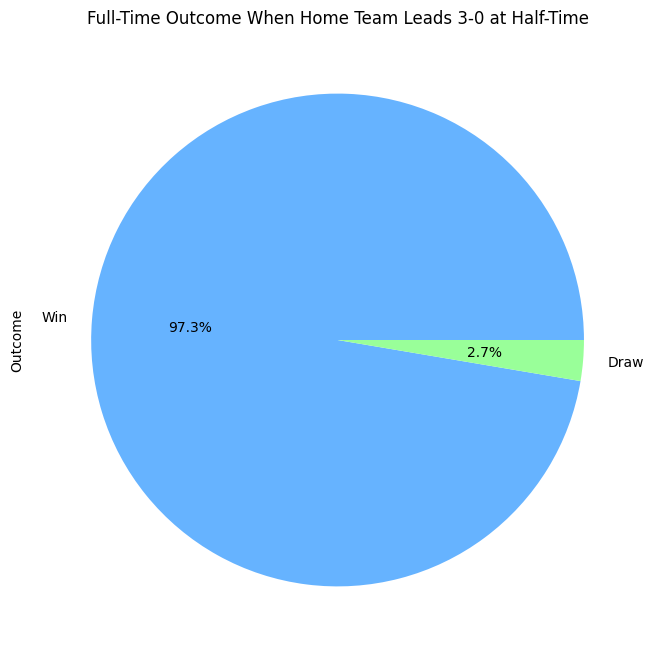

In [30]:
HomeWinning3 = HomeWinning3.copy()
HomeWinning3["FullTimeOutcome"] = HomeWinning3.apply(
    lambda row: "Win" if row["FullTimeHomeTeamGoals"] > row["FullTimeAwayTeamGoals"] 
                else "Draw" if row["FullTimeHomeTeamGoals"] == row["FullTimeAwayTeamGoals"] 
                else "Loss", axis=1
)

OutcomeHome3 = HomeWinning3["FullTimeOutcome"].value_counts()
OutcomeHome3.plot(
    kind='pie', 
    autopct='%1.1f%%',
    figsize=(8, 8), 
    colors=['#66b3ff', '#99ff99', '#ff9999']) 
plt.ylabel('Outcome');
plt.title("Full-Time Outcome When Home Team Leads 3-0 at Half-Time");  

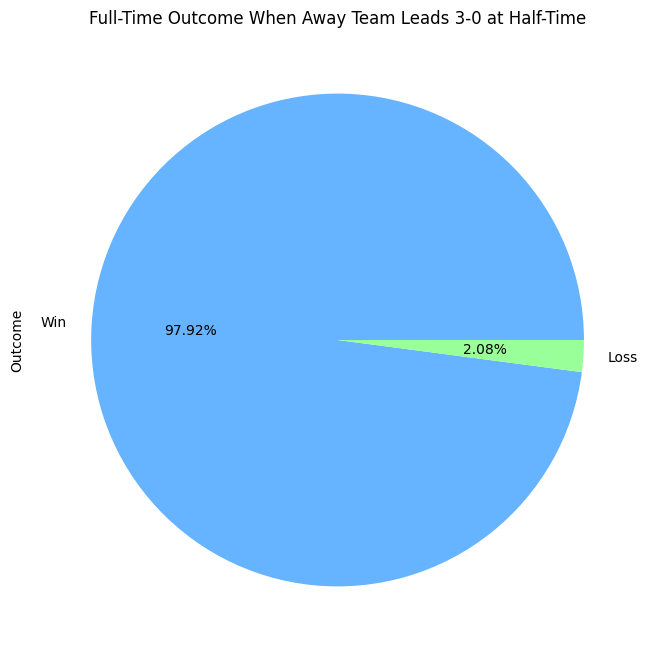

In [39]:
AwayWinning3 = AwayWinning3.copy()
AwayWinning3["FullTimeOutcome"] = AwayWinning3.apply(
    lambda row: "Win" if row["FullTimeAwayTeamGoals"] > row["FullTimeHomeTeamGoals"] 
                else "Draw" if row["FullTimeAwayTeamGoals"] == row["FullTimeHomeTeamGoals"] 
                else "Loss", axis=1
)

OutcomeAway3 = AwayWinning3["FullTimeOutcome"].value_counts()
OutcomeAway3.plot(
    kind='pie', 
    autopct='%1.2f%%',
    figsize=(8, 8), 
    colors=['#66b3ff', '#99ff99', '#ff9999']) 
plt.ylabel('Outcome');
plt.title("Full-Time Outcome When Away Team Leads 3-0 at Half-Time");  

Now that we have all of our pie charts, let's undertake a compartive analysis of the three different scorelines

Below we are transforming the outcomes into percentages to make it easier for to undertake a compartive analysis within a bar chart

In [32]:
OutcomeHome1Percent = (HomeWinning1["FullTimeOutcome"].value_counts(normalize=True) * 100).round(2)
OutcomeHome2Percent = (HomeWinning2["FullTimeOutcome"].value_counts(normalize=True) * 100).round(2)
OutcomeHome3Percent = (HomeWinning3["FullTimeOutcome"].value_counts(normalize=True) * 100).round(2)
OutcomeAway1Percent = (AwayWinning1["FullTimeOutcome"].value_counts(normalize=True) * 100).round(2)
OutcomeAway2Percent = (AwayWinning2["FullTimeOutcome"].value_counts(normalize=True) * 100).round(2)
OutcomeAway3Percent = (AwayWinning3["FullTimeOutcome"].value_counts(normalize=True) * 100).round(2)

Here we combine all of the home outcomes into one data frame

In [33]:
# Let's start by combining all of the home outcomes into one data frame

HomeCombined_df = pd.DataFrame({
    "FT Outcome When Home Team is Winning 1-0 at HT" : OutcomeHome1Percent,
    "FT Outcome When Home Team is Winning 2-0 at HT" : OutcomeHome2Percent,
    "FT Outcome When Home Team is Winning 3-0 at HT" : OutcomeHome3Percent

})

HomeCombined_df

,FT Outcome When Home Team is Winning 1-0 at HT,FT Outcome When Home Team is Winning 2-0 at HT,FT Outcome When Home Team is Winning 3-0 at HT
FullTimeOutcome,,,
Draw,18.76,4.86,2.67
Loss,8.37,1.74,NaN
Win,72.87,93.40,97.33


Let's transform the table into a bar chart for easier analysis

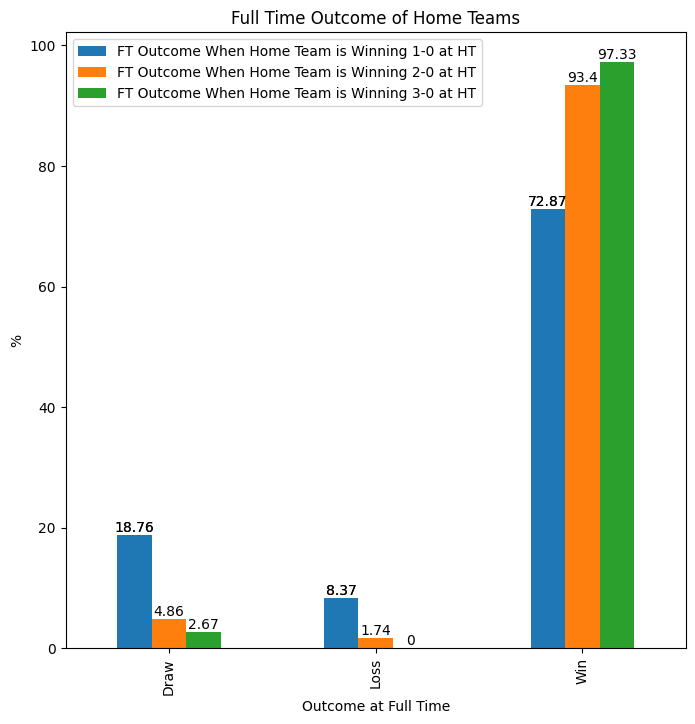

In [34]:
HomeCombinedPlot=HomeCombined_df.plot(
    kind='bar', 
    figsize=(8, 8), 
    )

    
HomeCombinedPlot.set_title('Full Time Outcome of Home Teams')
HomeCombinedPlot.set_xlabel('Outcome at Full Time') 
HomeCombinedPlot.set_ylabel('%') 
HomeCombinedPlot.bar_label(HomeCombinedPlot.containers[0])

for HomeContainer in HomeCombinedPlot.containers:
    HomeCombinedPlot.bar_label(HomeContainer)


When the Home team is winning 1-0 at half time, they win 72.87% of the games, as the half time scoreline increases, they win more and more games as evidenced by the data which states when winning 2-0 and 3-0, the Home team wins 93.4% and 97.33% of the games.<br /><br />
This concurs with common sense as the the bigger the goal difference between the Home and Away sides, the harder it is for the losing team to win the game.<br />
 As a result of the aforementioned effect the larger half time lead will lead to fewer draws and losses.<br />

To summarise, the data supports the idea that larger half time scores create larger scoreline security for the winning team.

Let's now extend the above analyis to Away teams

In [35]:
AwayCombined_df = pd.DataFrame({
    "FT Outcome When Away Team is Winning 1-0 at HT" : OutcomeAway1Percent,
    "FT Outcome When Away Team is Winning 2-0 at HT" : OutcomeAway2Percent,
    "FT Outcome When Away Team is Winning 3-0 at HT" : OutcomeAway3Percent

})


In [36]:
AwayCombined_df

,FT Outcome When Away Team is Winning 1-0 at HT,FT Outcome When Away Team is Winning 2-0 at HT,FT Outcome When Away Team is Winning 3-0 at HT
FullTimeOutcome,,,
Draw,22.16,6.19,NaN
Loss,13.26,4.64,2.08
Win,64.57,89.18,97.92


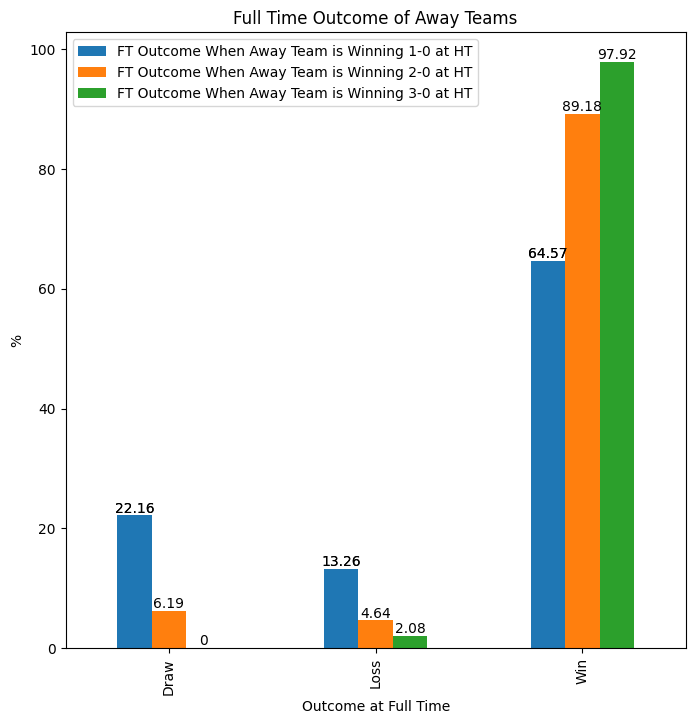

In [37]:
AwayCombinedPlot = AwayCombined_df.plot(
    kind='bar', 
    figsize=(8, 8), 
    )
    
    
    
AwayCombinedPlot.set_title('Full Time Outcome of Away Teams')
AwayCombinedPlot.set_xlabel('Outcome at Full Time') 
AwayCombinedPlot.set_ylabel('%') 
AwayCombinedPlot.bar_label(AwayCombinedPlot.containers[0])

for AwayContainer in AwayCombinedPlot.containers:
    AwayCombinedPlot.bar_label(AwayContainer)


The data shows that when the Away team is winning 1-0 at half time, they win 64.57% of the games, when the half time scoreline increases to 2-0, they win 89.18% of the games and finally, when they are winning 3-0 their win percentage increasaes to 97.12%. <br /><br />
The same effect discussed within the Home team analysis can be seen here aswell, the larger the half time scoreline, the larger the win percentage<br/>
The phenomenon spoke about earlier in the project can be evidenced here just by comparing this bar chart with the Home bar chart - it is clear to see when teams are at Home, they generally perform better than if they were Away as evidenced by the higher win % when at Home.<br />
<br />


In order to take our Home vs Away analysis further, we will now be using Power BI to create a dashboard of certain metrics to visualise the difference between playing at Home vs Away. <br />
Below we are going export our cleaned data into xlsx which will then be imported into Power BI.

In [38]:
df.to_excel('CombinedPremierLeagueData14to24.xlsx', index=False)